# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo CSV
csv_file_path = 'sinasc_RO_2019.csv'
df = pd.read_csv(csv_file_path)

# Exibir as primeiras linhas do DataFrame
print(df.head())

   ORIGEM   CODESTAB  CODMUNNASC  LOCNASC  IDADEMAE  ESTCIVMAE  \
0       1  2679477.0      110001        1        19        5.0   
1       1  2679477.0      110001        1        29        2.0   
2       1  2679477.0      110001        1        37        9.0   
3       1  2516500.0      110001        1        30        5.0   
4       1  2516500.0      110001        1        30        2.0   

            ESCMAE  CODOCUPMAE  QTDFILVIVO  QTDFILMORT  ...  KOTELCHUCK  \
0      8 a 11 anos         NaN         0.0         0.0  ...           5   
1      8 a 11 anos    999992.0         1.0         0.0  ...           5   
2      8 a 11 anos    513205.0         2.0         0.0  ...           5   
3  12 anos ou mais    231205.0         0.0         0.0  ...           4   
4      8 a 11 anos    999992.0         1.0         0.0  ...           5   

  CONTADOR munResStatus munResTipo               munResNome  munResUf  \
0        1        ATIVO      MUNIC    Alta Floresta D'Oeste  Rondônia   
1     

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
# Definir os intervalos e rótulos para categorizar a variável APGAR5
bins = [0, 3, 5, 7, 10]
labels = ['asfixia grave', 'asfixia moderada', 'asfixia leve', 'normal']

# Criar uma nova coluna com a categorização
df['APGAR5_categoria'] = pd.cut(df['APGAR5'], bins=bins, labels=labels, right=True)

# Exibir as primeiras linhas do DataFrame com a nova coluna
print(df[['APGAR5', 'APGAR5_categoria']].head())

   APGAR5 APGAR5_categoria
0    10.0           normal
1     9.0           normal
2    10.0           normal
3    10.0           normal
4    10.0           normal


#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

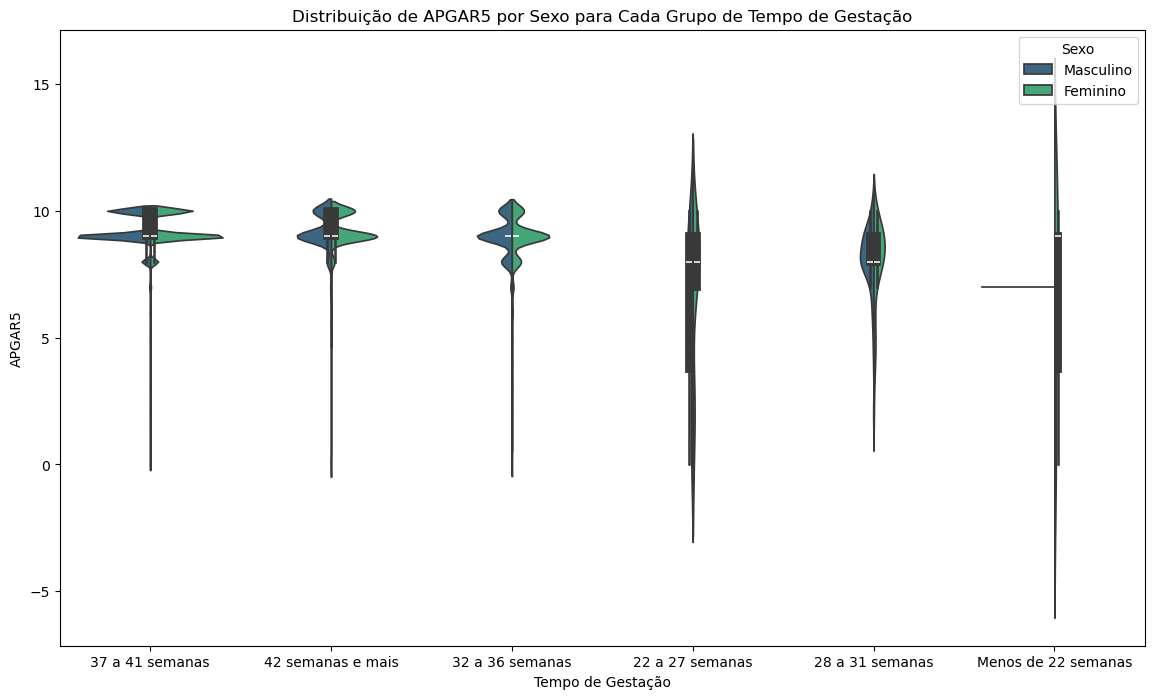

In [5]:
# Criar o gráfico de violino comparando a distribuição de APGAR5 por SEXO para cada grupo de GESTACAO
plt.figure(figsize=(14, 8))
sns.violinplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, palette='viridis', split=True)
plt.title('Distribuição de APGAR5 por Sexo para Cada Grupo de Tempo de Gestação')
plt.xlabel('Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [7]:
# Criar uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas
tabela_cruzada = pd.crosstab(index=df['GESTACAO'], columns=df['APGAR5'])

# Exibir a tabela cruzada
print(tabela_cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [9]:
# Calcular os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Exibir a tabela cruzada com os percentuais de linha
print(percentuais_linha)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

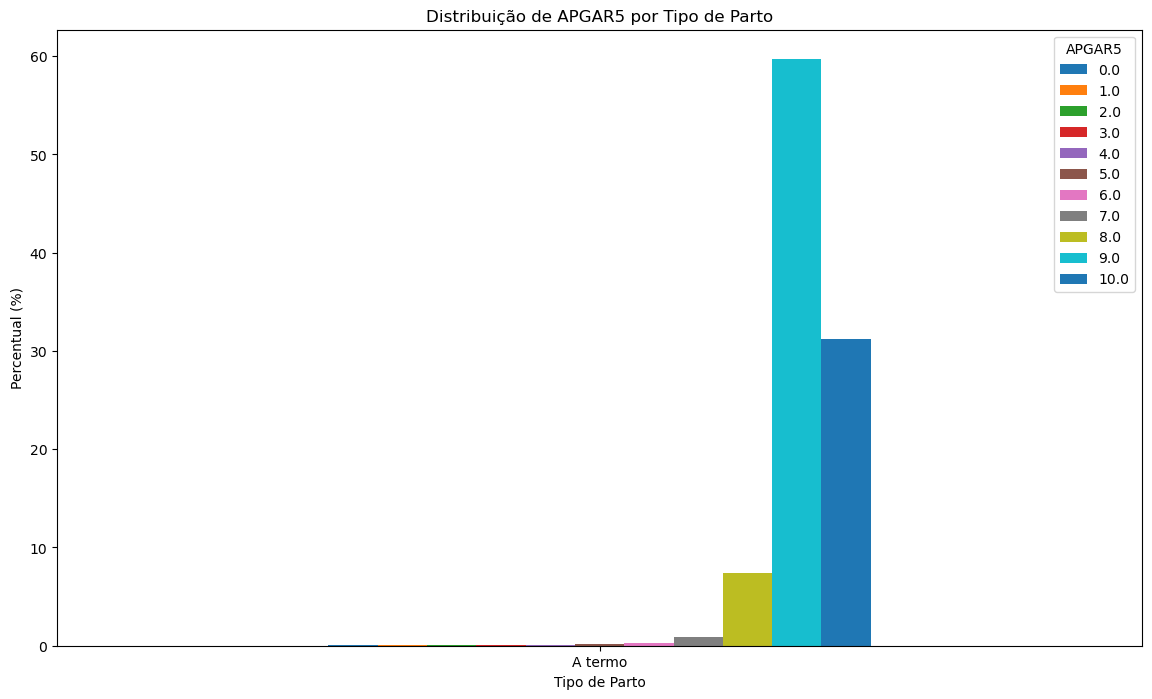

In [25]:
# Converter a coluna GESTACAO para numérico, forçando erros para NaN
df['GESTACAO'] = pd.to_numeric(df['GESTACAO'], errors='coerce')

# Criar uma nova coluna para classificar o parto como prematuro ou a termo
df['Parto'] = np.where(df['GESTACAO'] < 37, 'Prematuro', 'A termo')

# Calcular os percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100

# Criar o gráfico de barras da tabela cruzada
percentuais_linha.plot(kind='bar', figsize=(14, 8))
plt.title('Distribuição de APGAR5 por Tipo de Parto')
plt.xlabel('Tipo de Parto')
plt.ylabel('Percentual (%)')
plt.legend(title='APGAR5')
plt.xticks(rotation=0)
plt.show()

In [ ]:
#Conclusão

# Gestação Prematura: Os percentuais de APGAR5 indicam uma distribuição relativamente ampla de valores, com algumas categorias de APGAR5 (como 8 e 9) 
# apresentando maiores porcentagens. No entanto, também há uma presença significativa de valores baixos (0, 1, 2), sugerindo que alguns bebês nascidos 
# prematuramente têm APGAR5 baixos.
    
# Gestação a Termo: A distribuição é mais concentrada em valores mais altos de APGAR5, especialmente nas categorias 8 e 9, o que indica que
# bebês nascidos a termo tendem a ter um melhor resultado de APGAR5.

# Essas observações corroboram a ideia de que partos prematuros (menos de 37 semanas) estão associados a um maior risco de baixos escores de APGAR5 
# em comparação com partos a termo. Portanto, os dados parecem apoiar a classificação médica de que partos prematuros são mais propensos a ter 
# resultados de APGAR5 mais baixos.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

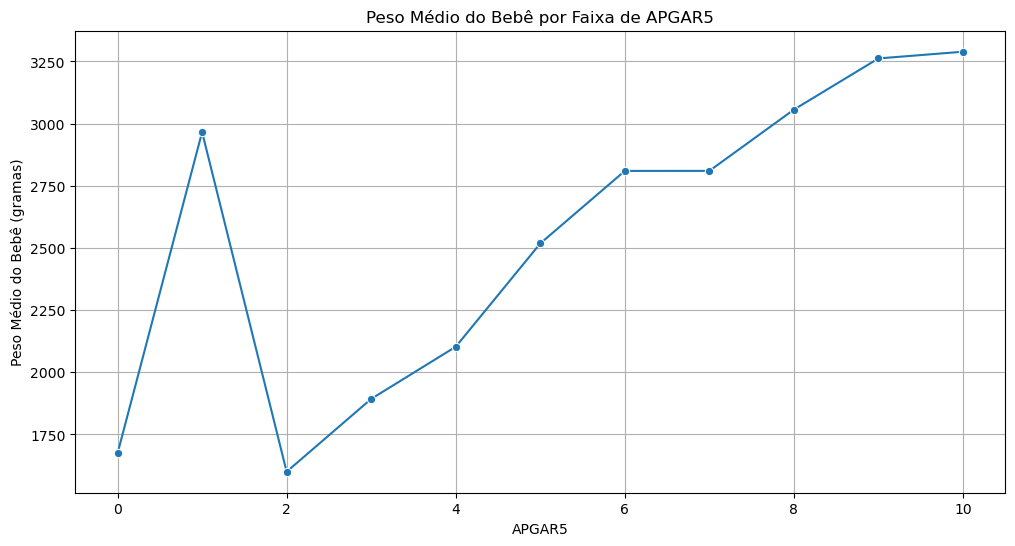

In [21]:
# Calcular a média do peso do bebê para cada faixa de APGAR5
media_peso = df.groupby('APGAR5')['PESO'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='APGAR5', y='PESO', data=media_peso, marker='o')
plt.title('Peso Médio do Bebê por Faixa de APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('Peso Médio do Bebê (gramas)')
plt.grid(True)
plt.show()